In [50]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'wsb-comments-2-28-24:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4512563%2F7724414%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240229%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240229T194223Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D886026554791dda1cd7483e1b7ebcdc7b55e80bdcdc87613185fc0cd9c84df23f47710a54872ac1d4b222a8ebe5303dc6979067fe8ba32ab538e730abba3f9b4704ddc113285f52384e9c9f9022aea41dfd5984e2d29925c2c2aca58b5a564dab5608be0ae662cecee399916cb7f96d6ac5eef6556ef43ed9ce0f5818ee83c3d29f5bc9148ef937fecbe03f94eda865a9fd283a8bc186ca1d207b2b93d3e368f11c7c3fa7ceab93188df9b3aabc723391682865a0d7d5c217cbe836ab5b461d1ed257bf8dd03dfa82f1d97508526c1c03bcd9858c4142a71e89bf1e32df70b5ec64e22a92b0179384fd1f04b032ac6708db58df24ca63e28cb97566ca280e9cb,wsb-comments-3000:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4517771%2F7731360%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240229%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240229T194223Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Db36112c5a1cd64964bc234b566d943e785896b9890ecd8c677fa44fff5b7efc385b04fce0f22eb394b178f2e3706334acb5ff3f41b4370fbe6f9212832f491388b8cee5080bea69e0d733e46247135ded6285897f41a69ff728ec719658fd37431f6b608059055943989a638db7c2d958884e8c00662e4959a2d44544ad393bb21e24a406cb1ea00a8da1fbe8f8eb094a3bf5ea690111e71293b8da1c269e161f8b9d24cca4ad2c1c9ed52638e663d4a2d653357f405f43106fa45b08df7dcc46adb6dbf825ae9d019ff6080536e8f619fdb62108008e4b1784a7be2dfb32d317a75fa3abf9e944258a68880d9a4074f1fbcce272a2aeece90930d2c2519589d'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 97233 bytes downloaded
Downloaded and uncompressed: wsb-comments-2-28-24
[==================================================] 129895 bytes downloaded
Downloaded and uncompressed: wsb-comments-3000
Data source import complete.


In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wsb-comments-3000/real_reddit_comments_2_28_24_2_29.csv
/kaggle/input/wsb-comments-2-28-24/real_reddit_comments_2_28_24.csv


In [52]:

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd
import matplotlib.pyplot as plt
nltk.download('all')

df = pd.read_csv('/kaggle/input/wsb-comments-3000/real_reddit_comments_2_28_24_2_29.csv')

comments = df['Comment']

df.head()


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

,Author,Comment,Date
0,Psychological_Chairs,Got out at 3.40 for C3.ai . Last second before...,2024-02-29T17:04:47.645Z
1,[deleted],Comment removed by moderator,2024-02-29T17:06:03.594Z
2,mjf1234,How many here are now homeless due to Mara?,2024-02-29T16:31:28.228Z
3,Dabtoker3000,How the hell is MARA going to have a better ea...,2024-02-29T15:34:55.160Z
4,hurryanil,Please don't recover snow. You're only thing I...,2024-02-29T13:49:22.923Z


Searching through the comment data to get mentioned stock tickers.

In [53]:
import pandas as pd
import re


# Extract text from the DataFrame
text = ''.join(str(comments))

# Define regex pattern to match 3 or 4 letter words
pattern = r'\b[a-zA-Z]{2,4}\b'

# Extract stock tickers from the text using regex
mentioned_tickers = re.findall(pattern, text)

# Remove duplicates and convert to a set to maintain unique tickers
mentioned_tickers = list(set(mentioned_tickers))

# Display the list of mentioned tickers
print(mentioned_tickers)
mentioned_tickers = ['MARA', 'BTC', 'QQQ', 'CRM', "SPY",]

['to', 'have', 'of', 'The', 'hard', 'Last', 'Fed', 'free', 'snow', 'and', 'here', 'Mara', 'see', 'at', 'are', 'ea', 're', 'Got', 'by', 'You', 'int', 'MARA', 'for', 'MSTR', 'hell', 'it', 'high', 'due', 'ca', 'Holy', 'on', 'Name', 'moly', 'don', 'call', 'now', 'out', 'is', 'only', 'the', 'many', 'take', 'ai', 'How']



## IGNORE THIS CODE  for some reason it doesn't recognize NLTK as being downloaded
Preprocess the data--tokenize and lemmatize. From https://www.datacamp.com/tutorial/text-analytics-beginners-nltk.

In [54]:
def preprocess_text(text):
    text  = str(text)
    # Tokenize the text

    tokens = word_tokenize(text.lower())

    # Remove stop words

    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens

    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text
nltk.download('wordnet',download_dir='/usr/local/share/nltk_data')
df['Comment'] = df['Comment'].apply(preprocess_text)
comments = df['Comment']

[nltk_data] Downloading package wordnet to
[nltk_data]     /usr/local/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Next we find the overall sentiment scores of the daily discussion.

In [55]:
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

def get_sentiment_score(comment):

    comment = str(comment)

    return sia.polarity_scores(comment)["compound"]

sentiment_scores = [get_sentiment_score(comment) for comment in comments]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Now we find the sentiment scores for the ticker MARA.


In [56]:

def analyze_sentiment_for_ticker(comments, stock_ticker):
    filtered_comments = [comment for comment in comments if isinstance(comment, str) and stock_ticker in comment]
    sentiment_scores = [intensity.polarity_scores(comment)["compound"] for comment in filtered_comments]
    return sentiment_scores




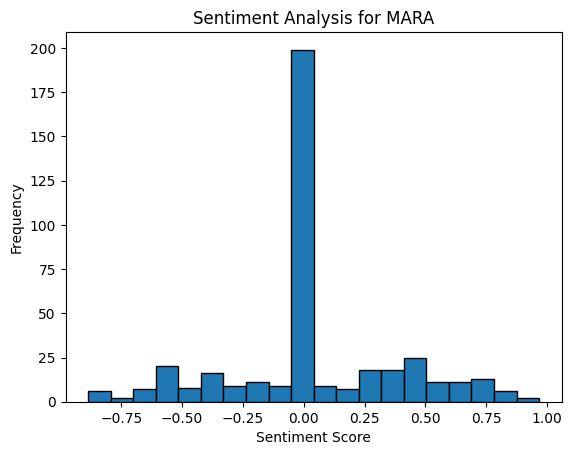

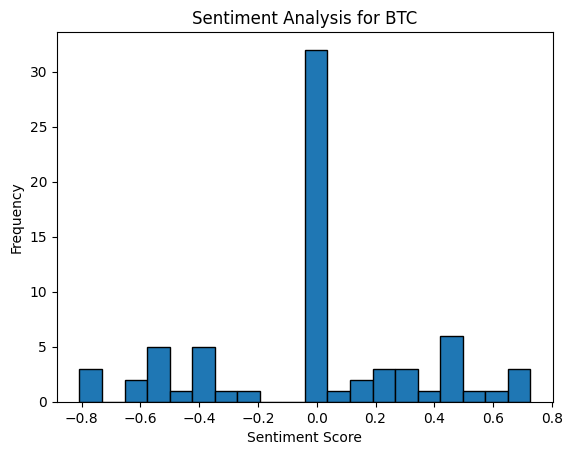

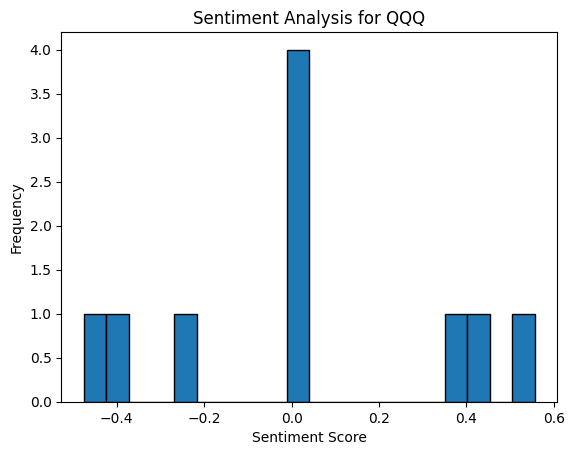

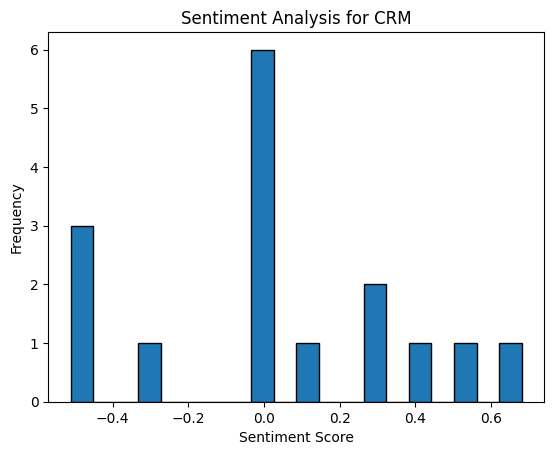

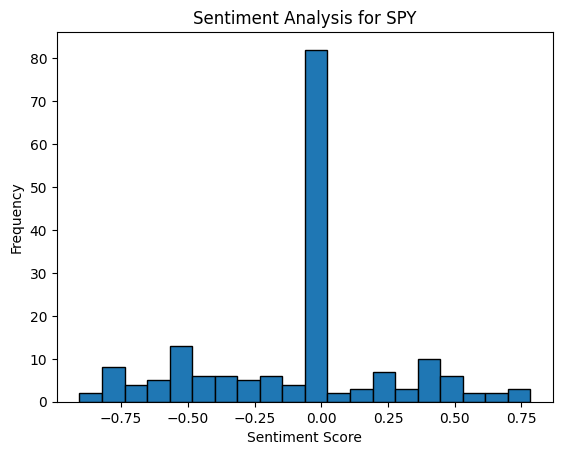

In [57]:

for stock_ticker in mentioned_tickers:
    intensity = SentimentIntensityAnalyzer()

    sentiment_scores_for_ticker = analyze_sentiment_for_ticker(comments, stock_ticker.lower())

    plt.hist(sentiment_scores_for_ticker, bins=20, edgecolor='black')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.title('Sentiment Analysis for ' + stock_ticker)
    plt.show()


In [58]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download NLTK resources (if not already downloaded)
nltk.download('vader_lexicon')

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Read the CSV file containing the comments

# Define a function to perform sentiment analysis
def analyze_sentiment(comment):
    # Get polarity scores
    scores = sia.polarity_scores(comment)
    # Classify sentiment based on compound score
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis function to each comment in the DataFrame

df['Sentiment'] = df['Comment'].apply(analyze_sentiment)

# Display the DataFrame with sentiment analysis results
print(df)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                    Author                                            Comment  \
0     Psychological_Chairs             got 3.40 c3.ai . last second huge drop   
1                [deleted]                          comment removed moderator   
2                  mjf1234                           many homeless due mara ?   
3             Dabtoker3000  hell mara going better earnings report bumble ...   
4                hurryanil    please n't recover snow . 're thing got right .   
...                    ...                                                ...   
2961  Affectionate-Idea690  fed 's collins : threat inflation remaining 2 ...   
2962           yanchovilla              sorry mara dumping 's bought call top   
2963           itsnotshade  holy moly take call mstr dump hard . holding b...   
2964   lostredditorlurking  regard see record high institution short inter...   
2965            kuklistyle                    easiest short mara , free money   

                          D

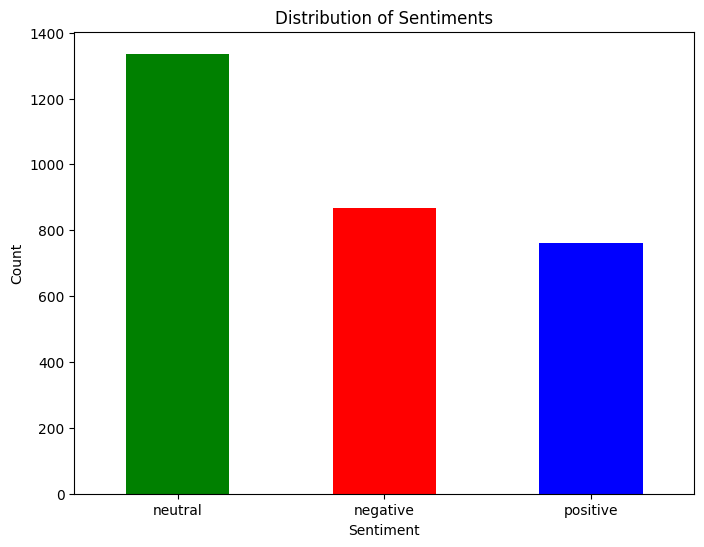

In [59]:
plt.figure(figsize=(8, 6))
df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

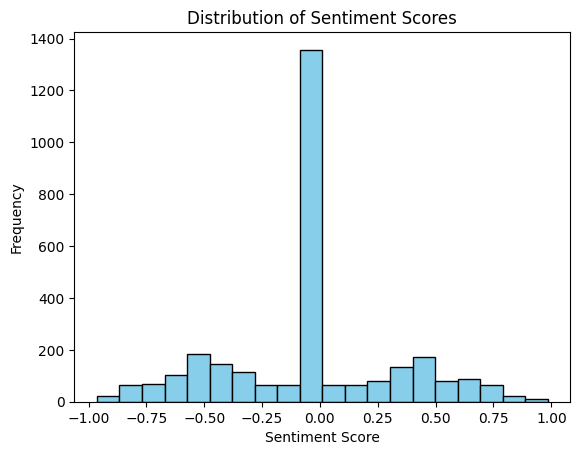

In [60]:
plt.hist(sentiment_scores, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()